In [87]:
# 1. Flowchart
import random

# 生成1到100之间的随机整数
a = random.randint(1, 100)  
b = random.randint(1, 100)
c = random.randint(1, 100)

def Print_values(a, b, c):
    if a > b:
        if b > c:
            values = [a, b, c]
        elif a > c:
            values = [a, c, b]
        else:
            values = [c, a, b]
    elif b > c:
        values = [b, a, c]
    else:
        values = [c, b, a]

    # 进行额外计算
    modified_values = [values[i] * (1 if i < 2 else -10) for i in range(3)]
    
    # 返回 modified_values 的和
    result = sum(modified_values)
    return result

# 调用函数并打印结果
final_result = Print_values(a, b, c)
print("Final Result:", final_result)

example_result = Print_values(10,5,1)
print("Example Result:", example_result)

Final Result: -588
Example Result: 5


In [2]:
# 2. Continuous ceiling function
# memo={1: 1},将F(1)储存为1
def F(x, memo={1: 1}): 
    if x in memo:
        return memo[x]
    result = F((x + 2) // 3) + 2 * x
    memo[x] = result
    return result

# 测试
N = [1, 3, 9, 27]
results = [F(x) for x in N]
print(results)

[1, 7, 25, 79]


In [21]:
# 3. Dice rolling
# 3.1.
def Find_number_of_ways(x):  
    # 初始化 dp 数组，dp[i][j] 表示使用 i 个骰子得到和为 j 的方法数  
    # dp[0][0] = 1 表示使用 0 个骰子得到和为 0 的方法只有 1 种（即不使用任何骰子）  
    dp = [[0] * (x + 1) for _ in range(11)]  
    dp[0][0] = 1  
  
    # 遍历每个可能的骰子数量（从 1 到 10）  
    for i in range(1, 11):  
        # 遍历每个可能的和（从 i 到 6*i，因为每个骰子最小是 1，最大是 6）  
        for j in range(i, x + 1):  
            # 更新 dp 数组，对于每个可能的骰子值 k（从 1 到 6）  
            for k in range(1, 7):  
                if j >= k:  
                    dp[i][j] += dp[i - 1][j - k]  
  
    # 返回使用 10 个骰子得到和为 x 的方法数  
    return dp[10][x]  

x = 30  
print(Find_number_of_ways(x))

# 3.2
# 定义一个空列表用于存储每个x的和的方式数量  
Number_of_ways = []  
  
# 计算从10到60的每个x的和的方式数量  
for x in range(10, 61):  
    number_of_ways = Find_number_of_ways(x)  
    Number_of_ways.append(number_of_ways)  
  
# 找出方式数量最多的x  
max_index = Number_of_ways.index(max(Number_of_ways))  
max_x = 10 + max_index 

print(max_x)

2930455
35


[1, 0, 5, 4, 1, 1, 3, 3, 3, 7]
14.0
[7.0, 4.5, 67.66666666666667, 120.0, 155.0, 210.00000000000006, 616.8571428571428, 1753.1250000000002, 2441.444444444447, 4910.4, 10979.363636363634, 23887.500000000007, 34654.23076923082, 55000.07142857155, 166019.46666666714, 303099.3750000007, 755585.7647058811, 1063135.4999999884, 2538652.842105272, 4980731.2500003595, 8588332.66666855, 23449966.77272771]


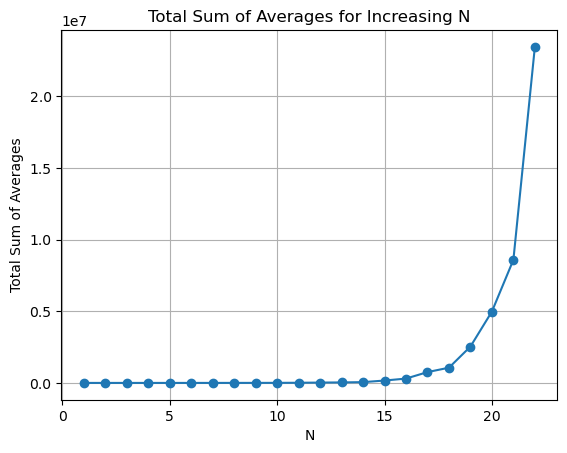

In [45]:
# 4.Dynamic programming
# 4.1
import random  
def Random_integer(N):
    # 定义一个空列表用于存储随机整数
    random_array = []
    for _ in range(N):
        # 生成随机从0到10之间的随机整数
        random_integer = random.randint(0,10)
        # 将随机整数添加到列表中 
        random_array.append(random_integer)
    # 输出填充好的列表
    return random_array

print(Random_integer(10))

# 4.2
from itertools import combinations  
def Sum_averages(arr):
    total_sum = 0.0
    n = len(arr)
    # 遍历所有可能的子集长度（从1到数组长度）  
    for r in range(1, n + 1):  
        # 生成长度为r的所有子集  
        for subset in combinations(arr, r):  
            # 计算当前子集的平均值  
            average = sum(subset) / len(subset)  
            # 将平均值加到总和中  
            total_sum += average 
    return total_sum
# 示例
arr = [1, 2, 3]  
result = Sum_averages(arr)  
print(result)

# 4.3
import matplotlib.pyplot as plt 
# 定义一个空列表来存储每个N对应的Sum_averages输出  
Total_sum_averages = []

# 对N从1到100进行循环  
for N in range(1, 23):  
    # 创建包含从1到N的整数的数组  
    arr = Random_integer(N) 
    # 计算Sum_averages并添加到列表中  
    total_sum = Sum_averages(arr)  
    Total_sum_averages.append(total_sum)  

print(Total_sum_averages)
#使用matplotlib进行绘图  
plt.plot(range(1, 23), Total_sum_averages, marker='o')  
plt.xlabel('N')  
plt.ylabel('Total Sum of Averages')  
plt.title('Total Sum of Averages for Increasing N')  
plt.grid(True)  
plt.show() 

In [208]:
# 5. Path counting
import numpy as np  
# 5.1  
def create_matrix(N, M): 
    # 创建一个N行M列的矩阵，初始化为0  
    matrix = np.zeros((N, M), dtype=int)
    
    if N>1 and M>1:
        for i in range(0, N):  
            for j in range(0, M):  
                matrix[i, j] = np.random.randint(0, 2)
    elif N>1 and M==1:
        for i in range(1, N):
            matrix[i,0]=np.random.randint(0, 2)
            matrix[-1,0]=1
    elif N==1 and M>1:
        for j in range(1, M-1):     
            matrix[0, j] = np.random.randint(0, 2)
            matrix[0,-1]=1
    # 填充左上角为1
    matrix[0,0] = 1
    matrix[-1,-1]=1
    return matrix
random_matrix = create_matrix(3,5)
print(random_matrix)

# 5.2
def Count_path(matrix):  
    N = len(matrix)  
    M = len(matrix[0])  
      
    # 创建一个与原始矩阵相同大小的DP数组，并初始化为0（表示不可达）  
    dp = [[0] * M for _ in range(N)]  
    # 左上角是起点，路径数为1（因为起点总是可达的）
    dp[0][0] = 1    
    
    # 填充第一列（如果可能）  
    for i in range(1, N):  
        # 如果当前单元格是可达的,从上方累加路径数（如果上方也是可达的）
        if matrix[i][0] == 1:   
            dp[i][0] = dp[i-1][0] if matrix[i-1][0] == 1 else 0
      
    # 填充第一行（如果可能）  
    for j in range(1, M):  
        # 如果当前单元格是可达的,从左方累加路径数（如果左方也是可达的）
        if matrix[0][j] == 1:   
            dp[0][j] = dp[0][j-1] if matrix[0][j-1] == 1 else 0    
      
    # 填充剩余的网格  
    for i in range(1, N):  
        for j in range(1, M):  
            # 如果当前单元格是可达的,从上方和左方累加路径数（如果它们是可达的）
            if matrix[i][j] == 1:       
                dp[i][j] = (dp[i-1][j] if matrix[i-1][j] == 1 else 0) + (dp[i][j-1] if matrix[i][j-1] == 1 else 0)  
    # 返回右下角单元格的路径数
    return dp[N-1][M-1]  

#5.3
total_sum = 0
for i in range(1000):
    matrix = create_matrix(10,8)
    path_num = Count_path(matrix)
    total_sum += path_num
    
mean_path_num = total_sum/1000
print(mean_path_num)

[[1 0 0 1 0]
 [0 0 1 0 0]
 [1 0 1 1 1]]
0.49
